In [273]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [274]:
data = pd.read_csv('crime_data.csv')

In [275]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column1   50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [276]:
data.isnull().sum()

Column1     0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [277]:
data.head(5)

,Column1,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [278]:
data.tail(5)

,Column1,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [279]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [280]:
def normalization(xi):
    norm=(xi-xi.min())/(xi.max()-xi.min())
    return norm
data1=normalization(data.iloc[:,1:])
data1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [281]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,0.420964,0.262380,0.0,0.197289,0.388554,0.629518,1.0
Assault,50.0,0.430685,0.285403,0.0,0.219178,0.390411,0.698630,1.0
UrbanPop,50.0,0.568475,0.245335,0.0,0.381356,0.576271,0.775424,1.0
Rape,50.0,0.360000,0.242025,0.0,0.200904,0.330749,0.487726,1.0


smallest and biggest states based on population

In [282]:
lowpop= data1[data1['UrbanPop']==0]
lowpop

,Murder,Assault,UrbanPop,Rape
44,0.084337,0.010274,0.0,0.100775


In [283]:
data.iloc[[44]]

,Column1,Murder,Assault,UrbanPop,Rape
44,Vermont,2.2,48,32,11.2


In [284]:
mostpop= data1[data1['UrbanPop']==1]
mostpop

,Murder,Assault,UrbanPop,Rape
4,0.493976,0.791096,1.0,0.860465


In [285]:
data.iloc[[4]]

,Column1,Murder,Assault,UrbanPop,Rape
4,California,9.0,276,91,40.6


the effect between population and crimes

In [286]:
data1['crime']= "0"
data1.head(5)

,Murder,Assault,UrbanPop,Rape,crime
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,0


In [287]:
data1['crime']= data1['Murder'] + data1["Assault"] + data1["Rape"]
data1.head(50)

,Murder,Assault,UrbanPop,Rape,crime
0,0.746988,0.654110,0.440678,0.359173,1.760271
1,0.554217,0.746575,0.271186,0.961240,2.262033
2,0.439759,0.852740,0.813559,0.612403,1.904902
3,0.481928,0.496575,0.305085,0.315245,1.293749
4,0.493976,0.791096,1.000000,0.860465,2.145537
5,0.427711,0.544521,0.779661,0.811370,1.783601
6,0.150602,0.222603,0.762712,0.098191,0.471396
7,0.307229,0.660959,0.677966,0.219638,1.187826
8,0.879518,0.993151,0.813559,0.635659,2.508328
9,1.000000,0.568493,0.474576,0.478036,2.046529


In [288]:
data2= data1.drop(['Murder','Assault','Rape'], axis= 1)
data2.head(5)

,UrbanPop,crime
0,0.440678,1.760271
1,0.271186,2.262033
2,0.813559,1.904902
3,0.305085,1.293749
4,1.000000,2.145537


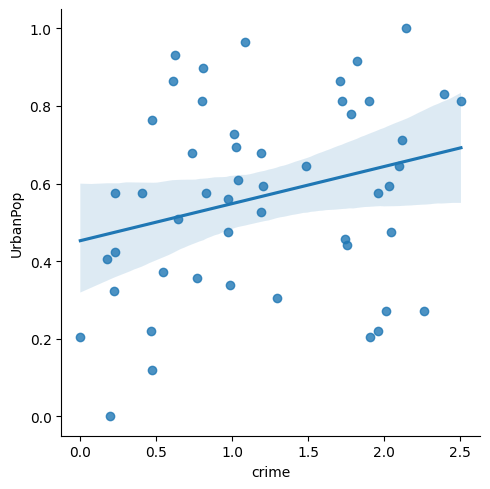

In [289]:
sns.lmplot(data= data2, x="crime", y="UrbanPop")

safest and most dangerous states

In [290]:
data1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,0.420964,0.262380,0.0,0.197289,0.388554,0.629518,1.000000
Assault,50.0,0.430685,0.285403,0.0,0.219178,0.390411,0.698630,1.000000
UrbanPop,50.0,0.568475,0.245335,0.0,0.381356,0.576271,0.775424,1.000000
Rape,50.0,0.360000,0.242025,0.0,0.200904,0.330749,0.487726,1.000000
crime,50.0,1.211649,0.701748,0.0,0.629129,1.062868,1.884182,2.508328


In [291]:
safest=data1[data1['crime']==0]
safest

,Murder,Assault,UrbanPop,Rape,crime
33,0.0,0.0,0.20339,0.0,0.0


In [292]:
data.iloc[[33]]

,Column1,Murder,Assault,UrbanPop,Rape
33,North Dakota,0.8,45,44,7.3


In [293]:
mostdan= data1[data1['crime']>2.5083]
mostdan

,Murder,Assault,UrbanPop,Rape,crime
8,0.879518,0.993151,0.813559,0.635659,2.508328


In [294]:
data.iloc[[8]]

,Column1,Murder,Assault,UrbanPop,Rape
8,Florida,15.4,335,80,31.9


k-means clustering

In [295]:
ss=StandardScaler()
ssdata=ss.fit_transform(data1.iloc[:,1:])

In [296]:
clustering=KMeans(4,random_state=1)
clustering.fit(ssdata)

KMeans(n_clusters=4, random_state=1)

In [297]:
clustering.labels_

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 1, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [298]:
data1['cluster']= clustering.labels_
data1

,Murder,Assault,UrbanPop,Rape,crime,cluster
0,0.746988,0.654110,0.440678,0.359173,1.760271,0
1,0.554217,0.746575,0.271186,0.961240,2.262033,3
2,0.439759,0.852740,0.813559,0.612403,1.904902,3
3,0.481928,0.496575,0.305085,0.315245,1.293749,0
4,0.493976,0.791096,1.000000,0.860465,2.145537,3
5,0.427711,0.544521,0.779661,0.811370,1.783601,3
6,0.150602,0.222603,0.762712,0.098191,0.471396,1
7,0.307229,0.660959,0.677966,0.219638,1.187826,1
8,0.879518,0.993151,0.813559,0.635659,2.508328,3
9,1.000000,0.568493,0.474576,0.478036,2.046529,0


In [299]:
data1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape,crime
,,mean,mean,mean,mean,mean
0,0,0.791416,0.680223,0.368644,0.364664,1.836302
1,1,0.304394,0.329371,0.705882,0.310990,0.944755
2,2,0.168675,0.114858,0.340287,0.126019,0.409551
3,3,0.612450,0.750000,0.754237,0.679802,2.042252


In [300]:
metrics.silhouette_score(ssdata,clustering.labels_)

0.35612197937467577

In [301]:
data1[data1['cluster']==0]

,Murder,Assault,UrbanPop,Rape,crime,cluster
0,0.746988,0.654110,0.440678,0.359173,1.760271,0
3,0.481928,0.496575,0.305085,0.315245,1.293749,0
9,1.000000,0.568493,0.474576,0.478036,2.046529,0
17,0.879518,0.698630,0.576271,0.385013,1.963161,0
23,0.921687,0.732877,0.203390,0.253230,1.907793,0
32,0.734940,1.000000,0.220339,0.227390,1.962330,0
39,0.819277,0.801370,0.271186,0.392765,2.013412,0
41,0.746988,0.489726,0.457627,0.506460,1.743174,0


most dangerous states based on murder count

In [302]:
data.iloc[[0,3,9,17,23,32,39,41]]

,Column1,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
3,Arkansas,8.8,190,50,19.5
9,Georgia,17.4,211,60,25.8
17,Louisiana,15.4,249,66,22.2
23,Mississippi,16.1,259,44,17.1
32,North Carolina,13.0,337,45,16.1
39,South Carolina,14.4,279,48,22.5
41,Tennessee,13.2,188,59,26.9


In [303]:
data1[data1['cluster']==1]

,Murder,Assault,UrbanPop,Rape,crime,cluster
6,0.150602,0.222603,0.762712,0.098191,0.471396,1
7,0.307229,0.660959,0.677966,0.219638,1.187826,1
10,0.271084,0.003425,0.864407,0.333333,0.607842,1
13,0.385542,0.232877,0.559322,0.354005,0.972424,1
15,0.313253,0.239726,0.576271,0.276486,0.829465,1
20,0.216867,0.356164,0.898305,0.232558,0.805590,1
24,0.493976,0.455479,0.644068,0.540052,1.489507,1
29,0.397590,0.390411,0.966102,0.297158,1.085159,1
34,0.391566,0.256849,0.728814,0.364341,1.012757,1
35,0.349398,0.363014,0.610169,0.328165,1.040577,1


In [304]:
data1[data1['cluster']==2]

,Murder,Assault,UrbanPop,Rape,crime,cluster
11,0.108434,0.256849,0.372881,0.178295,0.543578,2
14,0.084337,0.037671,0.423729,0.103359,0.225368,2
16,0.536145,0.219178,0.338983,0.232558,0.987881,2
18,0.078313,0.130137,0.322034,0.012920,0.221370,2
22,0.114458,0.092466,0.576271,0.196382,0.403306,2
25,0.313253,0.219178,0.355932,0.235142,0.767573,2
26,0.210843,0.195205,0.508475,0.237726,0.643775,2
28,0.078313,0.041096,0.406780,0.056848,0.176257,2
33,0.000000,0.000000,0.203390,0.000000,0.000000,2
40,0.180723,0.140411,0.220339,0.142119,0.463253,2


safest states

In [305]:
data.iloc[[11,14,16,18,22,25,26,28,33,40,44,47,48]]

,Column1,Murder,Assault,UrbanPop,Rape
11,Idaho,2.6,120,54,14.2
14,Iowa,2.2,56,57,11.3
16,Kentucky,9.7,109,52,16.3
18,Maine,2.1,83,51,7.8
22,Minnesota,2.7,72,66,14.9
25,Montana,6.0,109,53,16.4
26,Nebraska,4.3,102,62,16.5
28,New Hampshire,2.1,57,56,9.5
33,North Dakota,0.8,45,44,7.3
40,South Dakota,3.8,86,45,12.8


In [306]:
data1[data1['cluster']==3]

,Murder,Assault,UrbanPop,Rape,crime,cluster
1,0.554217,0.746575,0.271186,0.961240,2.262033,3
2,0.439759,0.852740,0.813559,0.612403,1.904902,3
4,0.493976,0.791096,1.000000,0.860465,2.145537,3
5,0.427711,0.544521,0.779661,0.811370,1.783601,3
8,0.879518,0.993151,0.813559,0.635659,2.508328,3
12,0.578313,0.698630,0.864407,0.431525,1.708468,3
19,0.632530,0.873288,0.593220,0.529716,2.035534,3
21,0.680723,0.719178,0.711864,0.718346,2.118247,3
27,0.686747,0.708904,0.830508,1.000000,2.395651,3
30,0.638554,0.821918,0.644068,0.640827,2.101299,3


most dangerous states

In [307]:
data.iloc[[1,2,4,5,8,12,19,21,27,30,31,42]]

,Column1,Murder,Assault,UrbanPop,Rape
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
8,Florida,15.4,335,80,31.9
12,Illinois,10.4,249,83,24.0
19,Maryland,11.3,300,67,27.8
21,Michigan,12.1,255,74,35.1
27,Nevada,12.2,252,81,46.0
30,New Mexico,11.4,285,70,32.1
